In [81]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [82]:
# Import clean csv from oilspill dataframes ipynb file
file_path = "yr2010_present_clean.csv"
oilspill_df = pd.read_csv(file_path, index_col = 'Unnamed: 0')
oilspill_df

,REPORT_NUMBER,NAME,DATE_OF_INCIDENT,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,TOTAL_BBLS_RELEASED,FATALITY_IND,INJURY_IND,SHUTDOWN_DUE_ACCIDENT_IND,...,RELEASE_TYPE,TOTAL_EST_COST,ACCIDENT_PRESSURE,SCADA_DETECTION_IND,CPM_DETECTION_IND,WATER_CONTAM_IND,CAUSE,CAUSE_DETAILS,YEAR_OF_INCIDENT,AGE_OF_FACILITY
0,20210333,MARATHON PIPE LINE LLC,2021-11-11,40.676195,-81.347826,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,0.50,NO,NO,YES,...,LEAK,2253.0,PRESSURE DID NOT EXCEED MOP,NO,NO,NO,EQUIPMENT FAILURE,"FAILURE OF EQUIPMENT BODY (EXCEPT PUMP), TANK ...",2021,4.0
1,20210335,"CASPER CRUDE TO RAIL, LLC",2021-11-10,42.944716,-106.442801,CRUDE OIL,0.36,NO,NO,NO,...,LEAK,11260.0,PRESSURE DID NOT EXCEED MOP,NO,NaN,NO,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,2021,2.0
2,20210331,WEST TEXAS GULF PIPELINE CO,2021-11-01,31.777937,-96.400398,CRUDE OIL,2.00,NO,NO,NO,...,LEAK,40168.0,PRESSURE DID NOT EXCEED MOP,NO,NO,NO,CORROSION FAILURE,INTERNAL CORROSION,2021,3.0
3,20210334,"FLINT HILLS RESOURCES, LC",2021-11-01,29.834136,-94.892281,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,2.20,NO,NO,YES,...,LEAK,505.0,PRESSURE DID NOT EXCEED MOP,NO,NO,NO,EQUIPMENT FAILURE,OTHER EQUIPMENT FAILURE,2021,3.0
4,20210330,CR PERMIAN PROCESSING LLC,2021-10-27,31.510493,-103.503215,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,10244.18,NO,NO,YES,...,OTHER,1035359.0,PRESSURE DID NOT EXCEED MOP,NaN,NaN,YES,CORROSION FAILURE,EXTERNAL CORROSION,2021,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,20100030,"PLAINS PIPELINE, L.P.",2010-01-07,33.582660,-96.648810,CRUDE OIL,700.00,NO,NO,NO,...,MECHANICAL PUNCTURE,29650.0,PRESSURE DID NOT EXCEED MOP,NO,NO,NO,EXCAVATION DAMAGE,EXCAVATION DAMAGE BY THIRD PARTY,2010,46.0
4636,20100260,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2010-01-06,46.689300,-92.061200,CRUDE OIL,0.48,NO,NO,NaN,...,LEAK,11540.0,NaN,NaN,NaN,NO,NATURAL FORCE DAMAGE,TEMPERATURE,2010,NaN
4637,20100038,"PETROLOGISTICS OLEFINS, LLC",2010-01-05,30.182400,-93.352400,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,2.00,NO,NO,NaN,...,LEAK,200.0,PRESSURE DID NOT EXCEED MOP,NO,NO,NO,EQUIPMENT FAILURE,DEFECTIVE OR LOOSE TUBING OR FITTING,2010,NaN
4638,20100254,PORTLAND PIPELINE CORP,2010-01-04,43.940280,-70.493360,CRUDE OIL,0.12,NO,NO,NaN,...,OTHER,4008.0,NaN,NaN,NaN,NO,EQUIPMENT FAILURE,PUMP OR PUMP-RELATED EQUIPMENT,2010,NaN


In [83]:
# Taking a look at the data
oilspill_df['CAUSE'].value_counts()

EQUIPMENT FAILURE                   2124
CORROSION FAILURE                    944
INCORRECT OPERATION                  674
MATERIAL FAILURE OF PIPE OR WELD     310
NATURAL FORCE DAMAGE                 217
EXCAVATION DAMAGE                    165
OTHER INCIDENT CAUSE                 114
OTHER OUTSIDE FORCE DAMAGE            91
Name: CAUSE, dtype: int64

In [84]:
age = oilspill_df['CAUSE'].loc[oilspill_df['AGE_OF_FACILITY']==0]
age.value_counts()

EQUIPMENT FAILURE                   198
INCORRECT OPERATION                 122
NATURAL FORCE DAMAGE                 11
OTHER INCIDENT CAUSE                  8
OTHER OUTSIDE FORCE DAMAGE            6
MATERIAL FAILURE OF PIPE OR WELD      5
CORROSION FAILURE                     3
EXCAVATION DAMAGE                     2
Name: CAUSE, dtype: int64

In [86]:
# Remove columns that will not be used for the model
oilspill_df = oilspill_df[['CAUSE', 'AGE_OF_FACILITY', 'ACCIDENT_PRESSURE']]
oilspill_df.head()

,CAUSE,AGE_OF_FACILITY,ACCIDENT_PRESSURE
0,EQUIPMENT FAILURE,4.0,PRESSURE DID NOT EXCEED MOP
1,EQUIPMENT FAILURE,2.0,PRESSURE DID NOT EXCEED MOP
2,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
3,EQUIPMENT FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
4,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP


In [87]:
# Look for null values
oilspill_df.isnull().sum()

CAUSE                   1
AGE_OF_FACILITY      1579
ACCIDENT_PRESSURE     738
dtype: int64

In [88]:
# Remove rows with null values
oilspill_df = oilspill_df.dropna()
oilspill_df

,CAUSE,AGE_OF_FACILITY,ACCIDENT_PRESSURE
0,EQUIPMENT FAILURE,4.0,PRESSURE DID NOT EXCEED MOP
1,EQUIPMENT FAILURE,2.0,PRESSURE DID NOT EXCEED MOP
2,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
3,EQUIPMENT FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
4,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
...,...,...,...
4628,MATERIAL FAILURE OF PIPE OR WELD,41.0,PRESSURE DID NOT EXCEED MOP
4633,MATERIAL FAILURE OF PIPE OR WELD,29.0,PRESSURE DID NOT EXCEED MOP
4634,MATERIAL FAILURE OF PIPE OR WELD,54.0,PRESSURE DID NOT EXCEED MOP
4635,EXCAVATION DAMAGE,46.0,PRESSURE DID NOT EXCEED MOP


In [89]:
# Consolidate accident pressure data for everything that exceeded maximum operating pressure (MOP)
oilspill_df['ACCIDENT_PRESSURE'].replace({'PRESSURE EXCEEDED 110% OF MOP': 'PRESSURE EXCEEDED MOP', 'PRESSURE EXCEEDED MOP, BUT DID NOT EXCEED 110% OF MOP': 'PRESSURE EXCEEDED MOP'}, inplace=True)
oilspill_df


,CAUSE,AGE_OF_FACILITY,ACCIDENT_PRESSURE
0,EQUIPMENT FAILURE,4.0,PRESSURE DID NOT EXCEED MOP
1,EQUIPMENT FAILURE,2.0,PRESSURE DID NOT EXCEED MOP
2,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
3,EQUIPMENT FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
4,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP
...,...,...,...
4628,MATERIAL FAILURE OF PIPE OR WELD,41.0,PRESSURE DID NOT EXCEED MOP
4633,MATERIAL FAILURE OF PIPE OR WELD,29.0,PRESSURE DID NOT EXCEED MOP
4634,MATERIAL FAILURE OF PIPE OR WELD,54.0,PRESSURE DID NOT EXCEED MOP
4635,EXCAVATION DAMAGE,46.0,PRESSURE DID NOT EXCEED MOP


In [90]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(oilspill_df)
X.head(10)

,AGE_OF_FACILITY,CAUSE_CORROSION FAILURE,CAUSE_EQUIPMENT FAILURE,CAUSE_EXCAVATION DAMAGE,CAUSE_INCORRECT OPERATION,CAUSE_MATERIAL FAILURE OF PIPE OR WELD,CAUSE_NATURAL FORCE DAMAGE,CAUSE_OTHER INCIDENT CAUSE,CAUSE_OTHER OUTSIDE FORCE DAMAGE,ACCIDENT_PRESSURE_PRESSURE DID NOT EXCEED MOP,ACCIDENT_PRESSURE_PRESSURE EXCEEDED MOP
0,4.0,0,1,0,0,0,0,0,0,1,0
1,2.0,0,1,0,0,0,0,0,0,1,0
2,3.0,1,0,0,0,0,0,0,0,1,0
3,3.0,0,1,0,0,0,0,0,0,1,0
4,3.0,1,0,0,0,0,0,0,0,1,0
5,2.0,0,1,0,0,0,0,0,0,1,0
6,0.0,0,0,0,0,0,0,1,0,1,0
7,56.0,0,0,0,0,0,0,1,0,1,0
8,9.0,0,1,0,0,0,0,0,0,1,0
9,51.0,0,0,0,0,0,0,0,1,1,0


In [91]:
# Standardize the data with StandardScaler().
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.85441917, -0.52074889,  1.16077243, ..., -0.14729424,
         0.15298217, -0.15298217],
       [-0.93315882, -0.52074889,  1.16077243, ..., -0.14729424,
         0.15298217, -0.15298217],
       [-0.893789  ,  1.92031136, -0.8614953 , ..., -0.14729424,
         0.15298217, -0.15298217],
       ...,
       [ 1.11407225, -0.52074889, -0.8614953 , ..., -0.14729424,
         0.15298217, -0.15298217],
       [ 0.79911363, -0.52074889, -0.8614953 , ..., -0.14729424,
         0.15298217, -0.15298217],
       [-0.97252865, -0.52074889, -0.8614953 , ..., -0.14729424,
        -6.53670953,  6.53670953]])

In [92]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)
X_pca

array([[-2.42143859e-01, -1.59937714e+00,  2.17057775e-01, ...,
         2.66905229e-02, -2.73631320e-02,  2.04514351e-02],
       [-2.34000960e-01, -1.64196246e+00,  2.18648505e-01, ...,
         2.35104630e-02, -2.79121508e-02,  1.72812132e-02],
       [-3.82777309e-01,  7.75894520e-01,  1.53190110e+00, ...,
        -1.31963923e-03, -9.41268884e-02, -8.86557898e-02],
       ...,
       [-4.34113077e-01,  1.51365434e+00, -2.18559187e+00, ...,
        -2.50291126e-02, -3.38514061e-01, -1.54446852e-01],
       [-4.44663606e-01,  1.43439350e+00, -1.37023442e+00, ...,
        -1.22369172e+00, -1.24385291e+00, -8.46834209e-01],
       [ 9.62445259e+00,  4.49408708e-01,  5.05300278e-01, ...,
         3.37637165e-01, -8.73134872e-02,  2.64785473e-01]])

In [94]:
# Add up the explained variance ratios and keep adding principal components until total variance ratios add up to .95
pca.explained_variance_ratio_

array([0.1957383 , 0.16602427, 0.1058654 , 0.10332756, 0.09692062,
       0.09477028, 0.09338804, 0.09293325])

In [93]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(
    data=X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index = oilspill_df.index
)
pcs_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.242144,-1.599377,0.217058,0.328313,-0.006255,0.026691,-0.027363,0.020451
1,-0.234001,-1.641962,0.218649,0.305690,-0.011617,0.023510,-0.027912,0.017281
2,-0.382777,0.775895,1.531901,-0.543928,-0.361976,-0.001320,-0.094127,-0.088656
3,-0.238072,-1.620670,0.217853,0.317002,-0.008936,0.025100,-0.027638,0.018866
4,-0.382777,0.775895,1.531901,-0.543928,-0.361976,-0.001320,-0.094127,-0.088656
5,-0.234001,-1.641962,0.218649,0.305690,-0.011617,0.023510,-0.027912,0.017281
6,-0.008384,-0.062153,-0.832690,-0.834316,0.587056,0.578194,5.426916,-3.758451
7,-0.236385,1.130236,-0.877230,-0.200864,0.737178,0.667236,5.442289,-3.669685
8,-0.262501,-1.492914,0.213081,0.384872,0.007148,0.034641,-0.025991,0.028377
9,-0.485285,1.270292,-1.151916,0.029769,1.125841,-1.048867,3.404776,5.601502


In [95]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 15))

# Looking for the best K
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)
    
# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [96]:
# Initialize the K-Means model with k=9 based on graph above.
model = KMeans(n_clusters=9, random_state=5)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([1, 1, 2, ..., 6, 5, 3], dtype=int32)

In [97]:
# Create a new DataFrame including predicted clusters and oil spill features.
# Concatentate the oilspill_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([oilspill_df, pcs_df], axis=1)

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['MODEL_CLASS'] = predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(3061, 12)


,CAUSE,AGE_OF_FACILITY,ACCIDENT_PRESSURE,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,MODEL_CLASS
0,EQUIPMENT FAILURE,4.0,PRESSURE DID NOT EXCEED MOP,-0.242144,-1.599377,0.217058,0.328313,-0.006255,0.026691,-0.027363,0.020451,1
1,EQUIPMENT FAILURE,2.0,PRESSURE DID NOT EXCEED MOP,-0.234001,-1.641962,0.218649,0.305690,-0.011617,0.023510,-0.027912,0.017281,1
2,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP,-0.382777,0.775895,1.531901,-0.543928,-0.361976,-0.001320,-0.094127,-0.088656,2
3,EQUIPMENT FAILURE,3.0,PRESSURE DID NOT EXCEED MOP,-0.238072,-1.620670,0.217853,0.317002,-0.008936,0.025100,-0.027638,0.018866,1
4,CORROSION FAILURE,3.0,PRESSURE DID NOT EXCEED MOP,-0.382777,0.775895,1.531901,-0.543928,-0.361976,-0.001320,-0.094127,-0.088656,2
5,EQUIPMENT FAILURE,2.0,PRESSURE DID NOT EXCEED MOP,-0.234001,-1.641962,0.218649,0.305690,-0.011617,0.023510,-0.027912,0.017281,1
6,OTHER INCIDENT CAUSE,0.0,PRESSURE DID NOT EXCEED MOP,-0.008384,-0.062153,-0.832690,-0.834316,0.587056,0.578194,5.426916,-3.758451,8
7,OTHER INCIDENT CAUSE,56.0,PRESSURE DID NOT EXCEED MOP,-0.236385,1.130236,-0.877230,-0.200864,0.737178,0.667236,5.442289,-3.669685,8
8,EQUIPMENT FAILURE,9.0,PRESSURE DID NOT EXCEED MOP,-0.262501,-1.492914,0.213081,0.384872,0.007148,0.034641,-0.025991,0.028377,1
9,OTHER OUTSIDE FORCE DAMAGE,51.0,PRESSURE DID NOT EXCEED MOP,-0.485285,1.270292,-1.151916,0.029769,1.125841,-1.048867,3.404776,5.601502,0


In [98]:
clustered_df['MODEL_CLASS'].value_counts()

1    1290
2     651
4     376
6     262
7     147
5     134
3      70
8      66
0      65
Name: MODEL_CLASS, dtype: int64

In [111]:
# Pull out class 1 information 
class1 = clustered_df[clustered_df['MODEL_CLASS'] == 1]
class1x = class1.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], axis=1)
class1x.value_counts().head()

CAUSE              AGE_OF_FACILITY  ACCIDENT_PRESSURE            MODEL_CLASS
EQUIPMENT FAILURE  0.0              PRESSURE DID NOT EXCEED MOP  1              196
                   1.0              PRESSURE DID NOT EXCEED MOP  1              162
                   2.0              PRESSURE DID NOT EXCEED MOP  1              112
                   3.0              PRESSURE DID NOT EXCEED MOP  1               81
                   4.0              PRESSURE DID NOT EXCEED MOP  1               66
dtype: int64

(array([617., 180.,  78.,  43.,  55.,  32.,  35.,  34.,  42.,  46.,  33.,
         27.,  28.,  17.,  13.,   2.,   4.,   0.,   3.,   1.]),
 array([ 0.  ,  4.75,  9.5 , 14.25, 19.  , 23.75, 28.5 , 33.25, 38.  ,
        42.75, 47.5 , 52.25, 57.  , 61.75, 66.5 , 71.25, 76.  , 80.75,
        85.5 , 90.25, 95.  ]),
 <BarContainer object of 20 artists>)

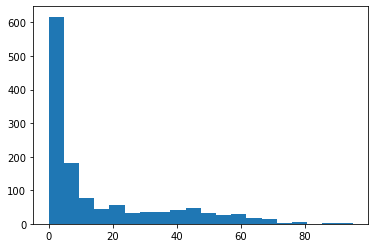

In [100]:
plt.hist(class1x['AGE_OF_FACILITY'], 20)

In [112]:
# Pull out class 2 information 
class2 = clustered_df[clustered_df['MODEL_CLASS'] == 2]
class2x = class2.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], axis=1)
class2x.value_counts().head()

CAUSE              AGE_OF_FACILITY  ACCIDENT_PRESSURE            MODEL_CLASS
CORROSION FAILURE  63.0             PRESSURE DID NOT EXCEED MOP  2              23
                   5.0              PRESSURE DID NOT EXCEED MOP  2              21
                   6.0              PRESSURE DID NOT EXCEED MOP  2              19
                   4.0              PRESSURE DID NOT EXCEED MOP  2              17
                   64.0             PRESSURE DID NOT EXCEED MOP  2              16
dtype: int64

(array([76., 58., 28., 27., 32., 29., 51., 39., 52., 32., 57., 78., 36.,
        16., 13., 17.,  7.,  1.,  1.,  1.]),
 array([  0. ,   5.6,  11.2,  16.8,  22.4,  28. ,  33.6,  39.2,  44.8,
         50.4,  56. ,  61.6,  67.2,  72.8,  78.4,  84. ,  89.6,  95.2,
        100.8, 106.4, 112. ]),
 <BarContainer object of 20 artists>)

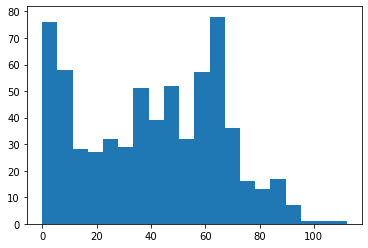

In [102]:
plt.hist(class2x['AGE_OF_FACILITY'], 20)

In [113]:
# Pull out class 4 information 
class4 = clustered_df[clustered_df['MODEL_CLASS'] == 4]
class4x = class4.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], axis=1)
class4x.value_counts().head()

CAUSE                AGE_OF_FACILITY  ACCIDENT_PRESSURE            MODEL_CLASS
INCORRECT OPERATION  0.0              PRESSURE DID NOT EXCEED MOP  4              119
                     1.0              PRESSURE DID NOT EXCEED MOP  4               35
                     2.0              PRESSURE DID NOT EXCEED MOP  4               19
                     4.0              PRESSURE DID NOT EXCEED MOP  4               16
                     3.0              PRESSURE DID NOT EXCEED MOP  4               14
dtype: int64

(array([203.,  42.,  19.,   5.,   7.,  12.,   3.,   5.,   9.,  16.,  13.,
          6.,   9.,  12.,   8.,   4.,   1.,   0.,   1.,   1.]),
 array([ 0.  ,  4.55,  9.1 , 13.65, 18.2 , 22.75, 27.3 , 31.85, 36.4 ,
        40.95, 45.5 , 50.05, 54.6 , 59.15, 63.7 , 68.25, 72.8 , 77.35,
        81.9 , 86.45, 91.  ]),
 <BarContainer object of 20 artists>)

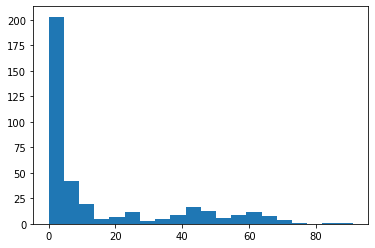

In [104]:
plt.hist(class4x['AGE_OF_FACILITY'], 20)

In [114]:
# Pull out class 6 information 
class6 = clustered_df[clustered_df['MODEL_CLASS'] == 6]
class6x = class6.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], axis=1)
class6x.value_counts().head()

CAUSE                             AGE_OF_FACILITY  ACCIDENT_PRESSURE            MODEL_CLASS
MATERIAL FAILURE OF PIPE OR WELD  51.0             PRESSURE DID NOT EXCEED MOP  6              11
                                  41.0             PRESSURE DID NOT EXCEED MOP  6              10
                                  64.0             PRESSURE DID NOT EXCEED MOP  6               8
                                  1.0              PRESSURE DID NOT EXCEED MOP  6               8
                                  47.0             PRESSURE DID NOT EXCEED MOP  6               8
dtype: int64

(array([25., 12.,  8.,  7.,  6.,  5., 14., 16., 27., 20., 32., 23., 21.,
        19., 14.,  3.,  1.,  3.,  4.,  2.]),
 array([ 0. ,  4.7,  9.4, 14.1, 18.8, 23.5, 28.2, 32.9, 37.6, 42.3, 47. ,
        51.7, 56.4, 61.1, 65.8, 70.5, 75.2, 79.9, 84.6, 89.3, 94. ]),
 <BarContainer object of 20 artists>)

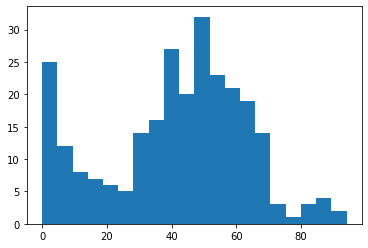

In [106]:
plt.hist(class6x['AGE_OF_FACILITY'], 20)

In [107]:
# Pull out class 7 information 
class7 = clustered_df[clustered_df['MODEL_CLASS'] == 7]
class7x = class7.drop(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], axis=1)
class7x.value_counts().head(10)

CAUSE                 AGE_OF_FACILITY  ACCIDENT_PRESSURE            MODEL_CLASS
NATURAL FORCE DAMAGE  1.0              PRESSURE DID NOT EXCEED MOP  7              14
                      0.0              PRESSURE DID NOT EXCEED MOP  7              10
                      3.0              PRESSURE DID NOT EXCEED MOP  7               9
                      2.0              PRESSURE DID NOT EXCEED MOP  7               6
                      65.0             PRESSURE DID NOT EXCEED MOP  7               5
                      6.0              PRESSURE DID NOT EXCEED MOP  7               5
                      15.0             PRESSURE DID NOT EXCEED MOP  7               5
                      11.0             PRESSURE DID NOT EXCEED MOP  7               5
                      48.0             PRESSURE DID NOT EXCEED MOP  7               4
                      50.0             PRESSURE DID NOT EXCEED MOP  7               4
dtype: int64

(array([39., 12., 12.,  8.,  5.,  4.,  1.,  2.,  2.,  6.,  8.,  7., 10.,
         3.,  4.,  6.,  9.,  7.,  1.,  1.]),
 array([ 0.  ,  3.85,  7.7 , 11.55, 15.4 , 19.25, 23.1 , 26.95, 30.8 ,
        34.65, 38.5 , 42.35, 46.2 , 50.05, 53.9 , 57.75, 61.6 , 65.45,
        69.3 , 73.15, 77.  ]),
 <BarContainer object of 20 artists>)

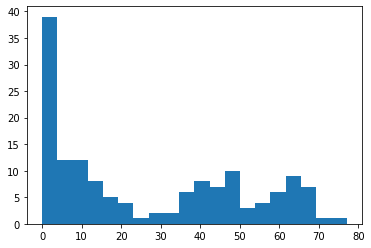

In [108]:
plt.hist(class7x['AGE_OF_FACILITY'], 20)

In [109]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x="CAUSE", y="ACCIDENT_PRESSURE", z="AGE_OF_FACILITY", color="MODEL_CLASS", hover_name="CAUSE", hover_data=["AGE_OF_FACILITY", "ACCIDENT_PRESSURE"], width=900)
fig.update_layout(legend=dict(x=0,y=1))
fig.show()

In [110]:
# Export model to csv file
clustered_df.to_csv('ml_model.csv', index=True)